# Linear Regression and Data Visualization with Seaborn

In [231]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

In [232]:
df = pd.read_csv('data/cost_revenue_dirty.csv')

## Data Exploration and Cleaning

In [233]:
print(f'The data have {df.shape[0]} rows and {df.shape[1]} columns')
print(f'The data have {df.isna().sum().sum()} NaN values')
print(f'The data have {df.duplicated().sum()} duplicated rows')
print(f'Type of columns:\n{df.dtypes}')

The data have 5391 rows and 6 columns
The data have 0 NaN values
The data have 0 duplicated rows
Type of columns:
Rank                      int64
Release_Date             object
Movie_Title              object
USD_Production_Budget    object
USD_Worldwide_Gross      object
USD_Domestic_Gross       object
dtype: object


In [234]:
# Removing $ and , from the columns
df['USD_Production_Budget'] = df['USD_Production_Budget'].str.replace('$', '').str.replace(',', '')
df['USD_Worldwide_Gross'] = df['USD_Worldwide_Gross'].str.replace('$', '').str.replace(',', '')
df['USD_Domestic_Gross'] = df['USD_Domestic_Gross'].str.replace('$', '').str.replace(',', '')

In [235]:
df.Release_Date = pd.to_datetime(df.Release_Date)

## Investigate the Films that had Zero Revenue

In [236]:
df['USD_Production_Budget'] = pd.to_numeric(df['USD_Production_Budget'])
df['USD_Worldwide_Gross'] = pd.to_numeric(df['USD_Worldwide_Gross'])
df['USD_Domestic_Gross'] = pd.to_numeric(df['USD_Domestic_Gross'])

In [237]:
# the average production budget of the films in the data set
avg_production_budget = df['USD_Production_Budget'].mean()
avg_production_budget

31113737.57837136

In [238]:
# the average worldwide gross revenue of films
avg_worldwide_gross = df['USD_Worldwide_Gross'].mean()
avg_worldwide_gross

88855421.96271564

In [239]:
min_domestic_gross = df['USD_Domestic_Gross'].min()
min_worldwide_gross = df['USD_Worldwide_Gross'].min()
print(min_domestic_gross)
print(min_worldwide_gross)

0
0


In [240]:
# Are the bottom 25% of films actually profitable or do they lose money?
bottom_25_percent = df['USD_Worldwide_Gross'].quantile(0.25)
bottom_25_percent

3865206.0

In [241]:
# the highest production budget and highest worldwide gross revenue of any film
max_production_budget = df['USD_Production_Budget'].max()
max_worldwide_gross = df['USD_Worldwide_Gross'].max()
print(max_production_budget)
print(max_worldwide_gross)

425000000
2783918982


In [242]:
# How much revenue did the lowest budget films make?
min_production_budget = df['USD_Production_Budget'].min()
min_budget_films = df[df['USD_Production_Budget'] == min_production_budget]
min_budget_revenue = min_budget_films['USD_Worldwide_Gross']
min_budget_revenue

2427    181041
Name: USD_Worldwide_Gross, dtype: int64

In [243]:
# How much revenue did the highest budget films make?
max_budget_films = df[df['USD_Production_Budget'] == max_production_budget]
max_budget_revenue = max_budget_films['USD_Worldwide_Gross']
max_budget_revenue

3529    2783918982
Name: USD_Worldwide_Gross, dtype: int64

In [244]:
# How many films grossed $0 domestically?
zero_domestic_gross = df[df['USD_Domestic_Gross'] == 0]
zero_domestic_gross.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5090,556,2015-12-31,"Don Gato, el inicio de la pandilla",80000000,4547660,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [245]:
# How many films grossed $0 worldwide? What are the highest budget films that had no revenue internationally (i.e., the biggest flops)?
zero_worldwide_gross = df[df['USD_Worldwide_Gross'] == 0]
zero_worldwide_gross.sort_values('USD_Production_Budget', ascending=False)

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
5388,96,2020-12-31,Singularity,175000000,0,0
5387,126,2018-12-18,Aquaman,160000000,0,0
5384,321,2018-09-03,A Wrinkle in Time,103000000,0,0
5385,366,2018-10-08,Amusement Park,100000000,0,0
5058,880,2015-11-12,The Ridiculous 6,60000000,0,0
...,...,...,...,...,...,...
4787,5371,2014-12-31,Stories of Our Lives,15000,0,0
3056,5374,2007-12-31,Tin Can Man,12000,0,0
4907,5381,2015-05-19,Family Motocross,10000,0,0
5006,5389,2015-09-29,Signed Sealed Delivered,5000,0,0


In [246]:
# which films made money internationally but had zero box office revenue in the United States?
international_releases = df.loc[(df['USD_Domestic_Gross'] == 0) & (df['USD_Worldwide_Gross'] != 0)]
# OR
international_releases = df.query('USD_Domestic_Gross == 0 and USD_Worldwide_Gross != 0')
international_releases

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
71,4310,1956-02-16,Carousel,3380000,3220,0
1579,5087,2001-02-11,Everything Put Together,500000,7890,0
1744,3695,2001-12-31,The Hole,7500000,10834406,0
2155,4236,2003-12-31,Nothing,4000000,63180,0
2203,2513,2004-03-31,The Touch,20000000,5918742,0
...,...,...,...,...,...,...
5340,1506,2017-04-14,Queen of the Desert,36000000,1480089,0
5348,2225,2017-05-05,Chāi dàn zhuānjiā,23000000,58807172,0
5360,4832,2017-07-03,Departure,1100000,27561,0
5372,1856,2017-08-25,Ballerina,30000000,48048527,0


In [247]:
# Removing the unreleased films
unreleased_films = df.query(
    'USD_Domestic_Gross == 0 and USD_Worldwide_Gross == 0 and Release_Date > "2018-05-01"'
)
len(unreleased_films)

7

In [248]:
data_clean = df.drop(unreleased_films.index)
data_clean

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000
1,5140,1916-05-09,Intolerance,385907,0,0
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000
...,...,...,...,...,...,...
5379,1295,2017-10-02,John Wick: Chapter Two,40000000,166893990,92029184
5380,70,2017-10-03,Kong: Skull Island,185000000,561137727,168052812
5381,94,2017-12-05,King Arthur: Legend of the Sword,175000000,140012608,39175066
5382,1254,2017-12-05,Snatched,42000000,57850343,45850343


In [249]:
# Films that Lost Money
lost_money = data_clean.loc[data_clean['USD_Production_Budget'] > data_clean['USD_Worldwide_Gross']]
len(lost_money) / len(data_clean) * 100

37.27711738484398

## Seaborn Data Visualization: Bubble Charts

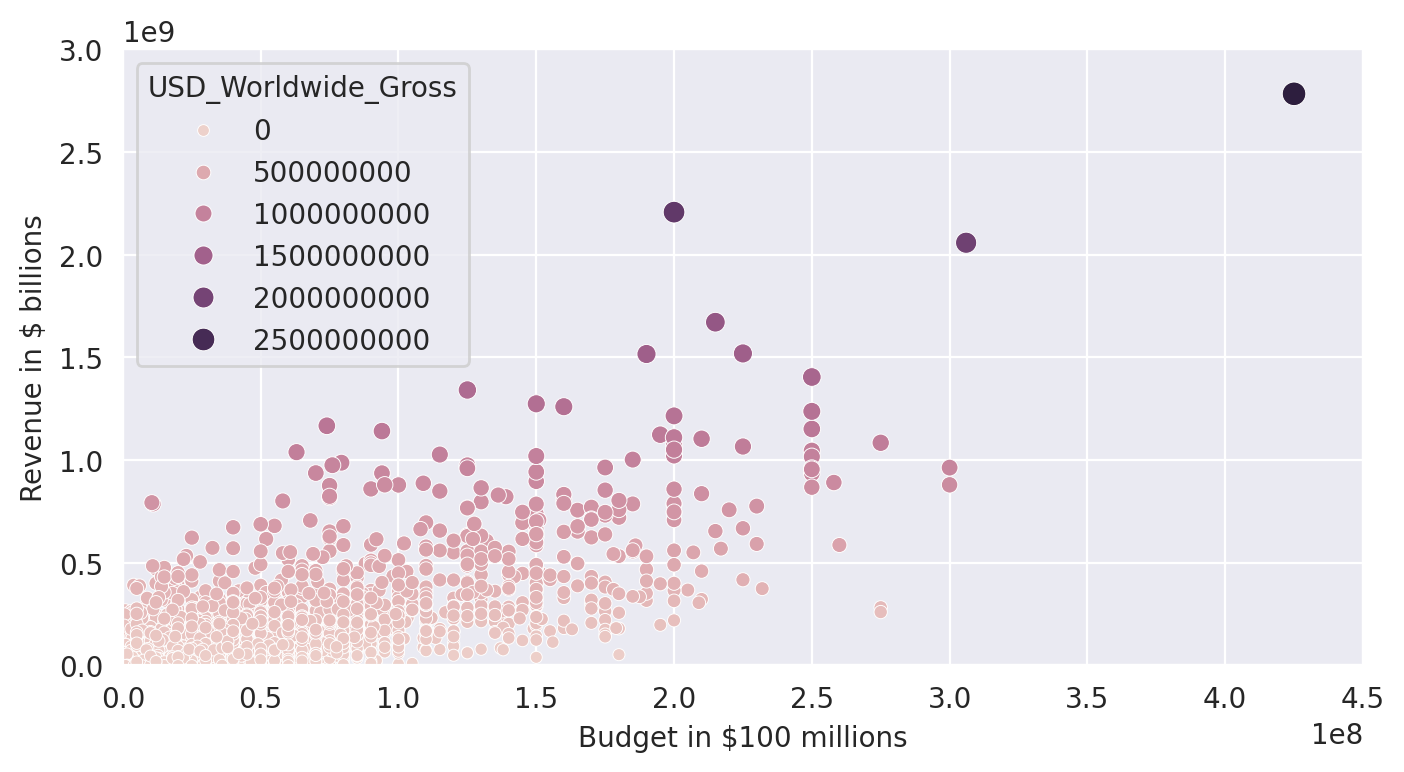

In [250]:
plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=data_clean,
                       x='USD_Production_Budget',
                       y='USD_Worldwide_Gross',
                       hue='USD_Worldwide_Gross',
                       size='USD_Worldwide_Gross')

  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')

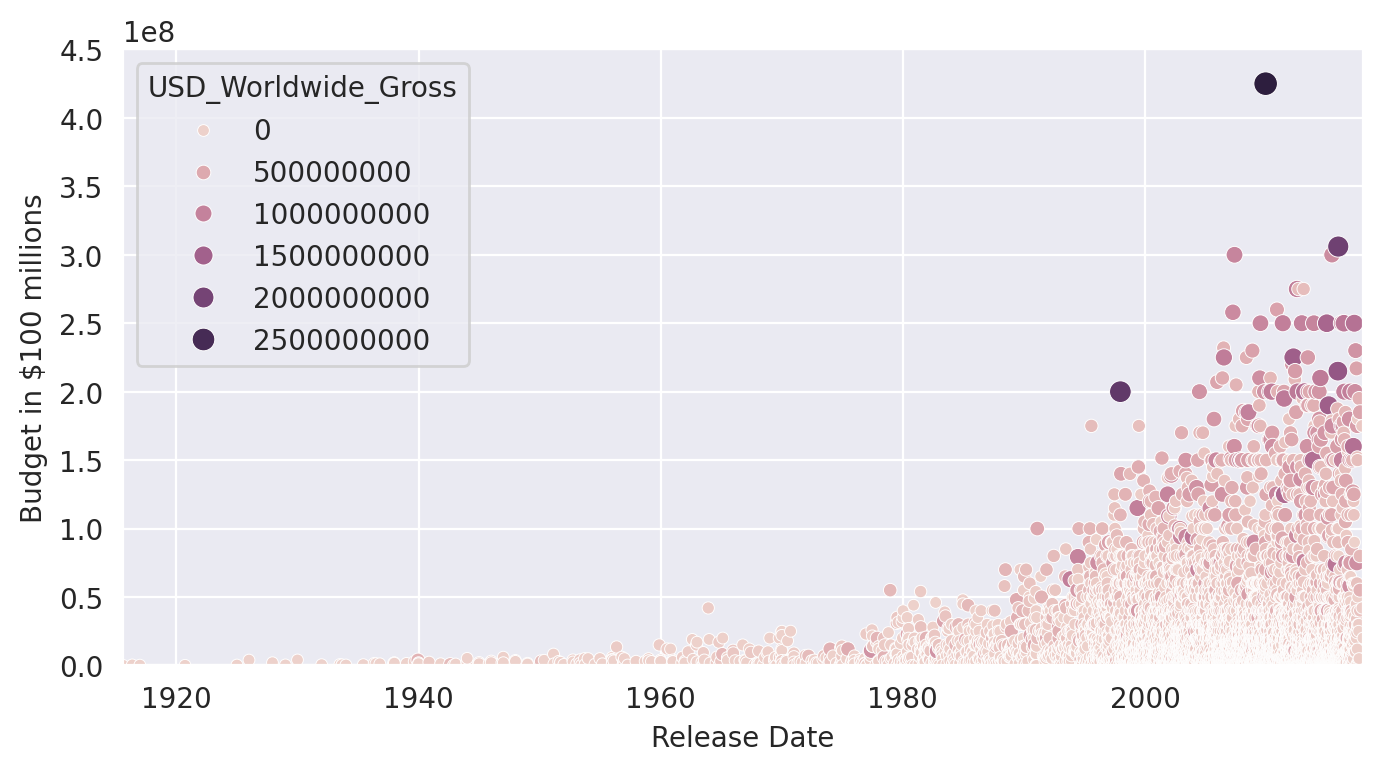

In [251]:
plt.figure(figsize=(8,4), dpi=200)

with sns.axes_style('darkgrid'):
    ax = sns.scatterplot(
        data=data_clean, 
        x='Release_Date', 
        y='USD_Production_Budget', 
        hue='USD_Worldwide_Gross', 
        size='USD_Worldwide_Gross'
    )
    
    ax.set(
        ylim=(0, 450000000), 
        xlim=(data_clean['Release_Date'].min(), 
              data_clean['Release_Date'].max()), 
        ylabel='Budget in $100 millions', 
        xlabel='Release Date'
    )
    

## Creating new *Decade* Column

In [252]:
release_year = pd.DatetimeIndex(data_clean['Release_Date']).year
decade = release_year // 10 * 10
data_clean['Decade'] = decade
data_clean.head()

,Rank,Release_Date,Movie_Title,USD_Production_Budget,USD_Worldwide_Gross,USD_Domestic_Gross,Decade
0,5293,1915-08-02,The Birth of a Nation,110000,11000000,10000000,1910
1,5140,1916-05-09,Intolerance,385907,0,0,1910
2,5230,1916-12-24,"20,000 Leagues Under the Sea",200000,8000000,8000000,1910
3,5299,1920-09-17,Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4,5222,1925-01-01,The Big Parade,245000,22000000,11000000,1920


In [253]:
old_films = data_clean[data_clean.Decade <= 1960]
new_films = data_clean[data_clean.Decade > 1960]

## Plotting Linear Regressions with Seaborn

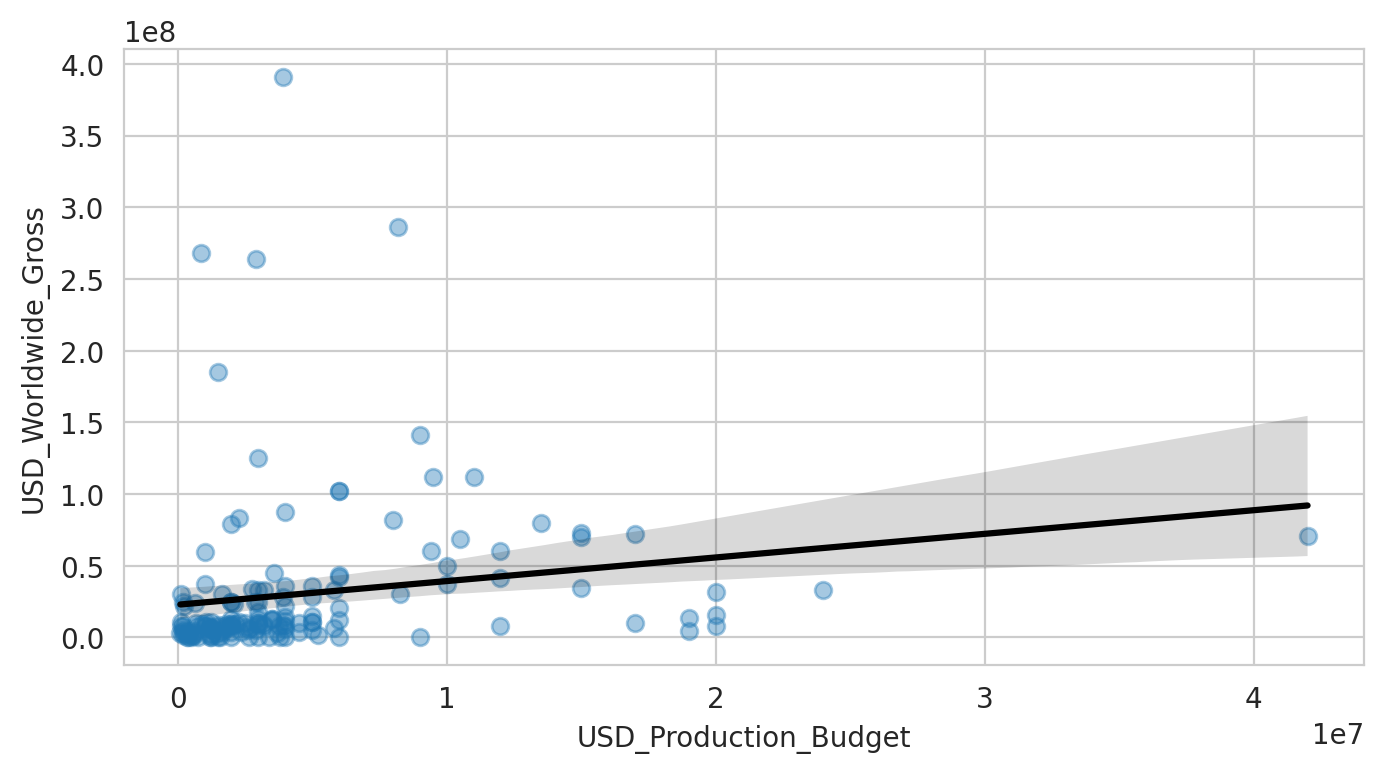

In [254]:
# Plotting the data for old films
plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style("whitegrid"):
  sns.regplot(data=old_films,
              x='USD_Production_Budget',
              y='USD_Worldwide_Gross',
              scatter_kws={'alpha': 0.4},
              line_kws={'color': 'black'})

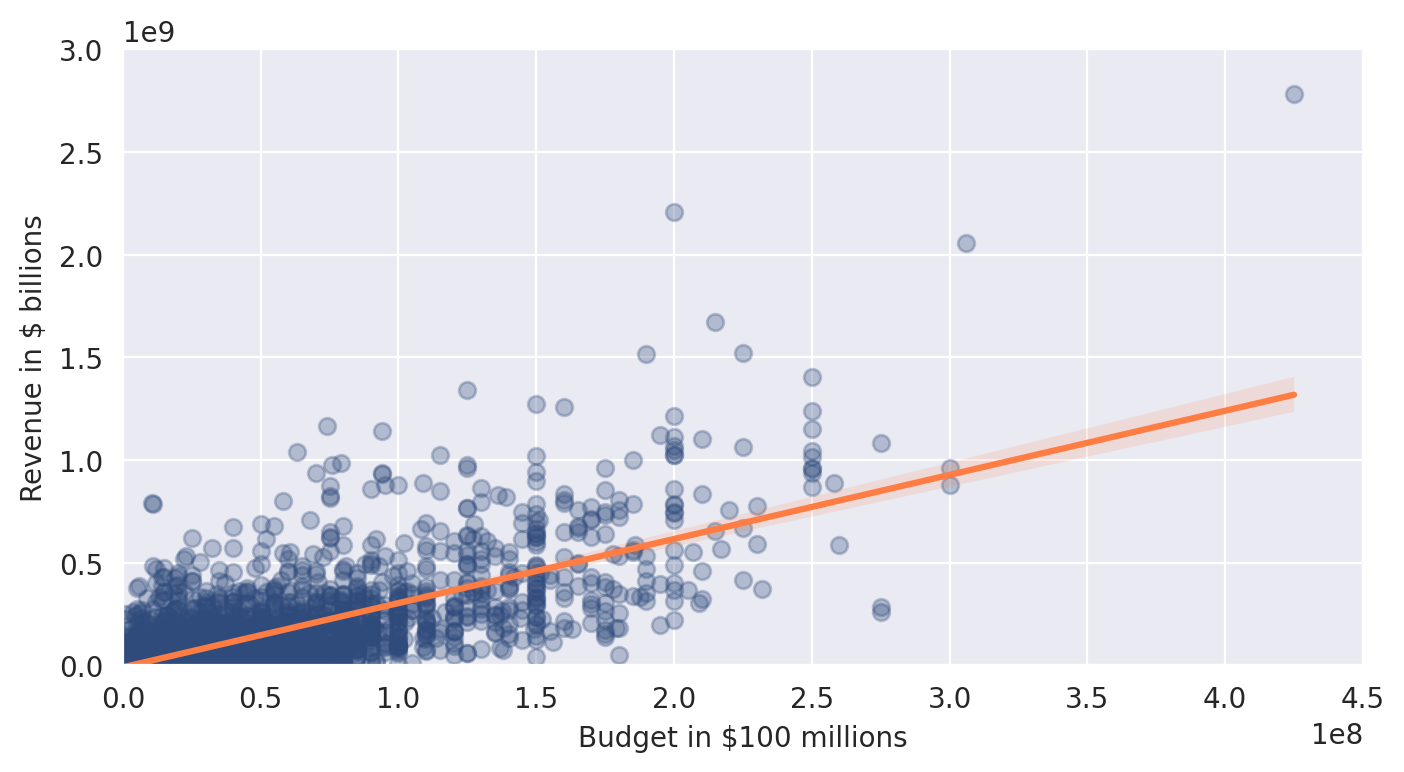

In [255]:
# Plotting the data for new films

plt.figure(figsize=(8, 4), dpi=200)

with sns.axes_style('darkgrid'):
  ax = sns.regplot(data=new_films,
                   x='USD_Production_Budget',
                   y='USD_Worldwide_Gross',
                   color='#2f4b7c',
                   scatter_kws={'alpha': 0.3},
                   line_kws={'color': '#ff7c43'})

  ax.set(ylim=(0, 3000000000),
         xlim=(0, 450000000),
         ylabel='Revenue in $ billions',
         xlabel='Budget in $100 millions')

## Use scikit-learn to Run Regression

In [256]:
regression = LinearRegression()

In [257]:
# LinearRegression does not like receiving Pandas Series
# Explanatory Variable(s) or Feature(s)
X = pd.DataFrame(new_films, columns=['USD_Production_Budget'])

# Response Variable or Target
y = pd.DataFrame(new_films, columns=['USD_Worldwide_Gross'])

In [258]:
regression.fit(X, y)

LinearRegression()

In [259]:
regression.intercept_

array([-8650768.00661027])

In [260]:
regression.coef_

array([[3.12259592]])

In [261]:
# R-squared
# our model explains about 56% of the variance in movie revenue
regression.score(X, y)

0.5577032617720403

In [262]:
# how much global revenue does our model estimate for a film with a budget of $350 million?
budget = 350000000
revenue_estimate = regression.intercept_[0] + regression.coef_[0, 0]*budget
revenue_estimate = round(revenue_estimate, -6)
print(
    f'The estimated revenue for a $350 film is around ${revenue_estimate:.10}.')

The estimated revenue for a $350 film is around $1.084e+09.
